## Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [2]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

In [3]:
display(cab.shape)
display(cab.head(5))

(359392, 7)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
display(city.shape)
display(city.head(5))

(20, 3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
display(customer.shape)
display(customer.head(5))

(49171, 4)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
display(transaction.shape)
display(transaction.head(5))

(440098, 3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## Clean Data

In [7]:
# Convert "Date of Travel" from integer to date format
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'], origin='1899-12-30', unit='D')

In [8]:
# Remove any commas and convert the columns to numeric types
city['Population'] = city['Population'].str.replace(',', '').astype(int)
city['Users'] = city['Users'].str.replace(',', '').astype(int)

In [9]:
# Ensure there are no missing values
customer.isnull().sum()  # This should show 0 for all columns

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [10]:
# Ensure there are no missing values
transaction.isnull().sum()  # This should show 0 for all columns

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

## Merge Data

In [11]:
# Merge Cab_Data with Transaction_ID on "Transaction ID"
merged_data_1 = pd.merge(cab, transaction, on="Transaction ID")

In [12]:
# Merge the result with Customer_ID on "Customer ID"
merged_data_2 = pd.merge(merged_data_1, customer, on="Customer ID")

In [13]:
# Merge the result with City on "City"
final_merged_data = pd.merge(merged_data_2, city, on="City")

In [14]:
# Display the first few rows of the final merged data
print(final_merged_data.head())

   Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350        29290         Card   Male   28   
1         598.70      317.4228        29290         Cash   Male   28   
2         792.05      597.4020        29290         Card   Male   28   
3         358.52      334.8540        27703         Card   Male   27   
4         721.10      467.1192        27703         Card   Male   27   

   Income (USD/Month)  Population  Users  
0               10813      814885  24701  
1               10813      814885  2

In [15]:
final_merged_data.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

## Data Understanding (Descriptive Statistics)

In [16]:
# Calculate basic statistics
descStats = final_merged_data.describe()

# Display descriptive statistics
print(descStats)

       Transaction ID   KM Travelled  Price Charged   Cost of Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

         Customer ID            Age  Income (USD/Month)    Population  \
count  359392.000000  359392.000000       359392.000000  3.593920e+05   
mean    19191.652115      35.336705        15048.822937  3.132198e+06   
std     21012.412463      12.594234         7969.409482  3.315194e+06   
min         1.000000      18.000000         2000.000000  2.489680e+05   
25% 

## Data Visualization

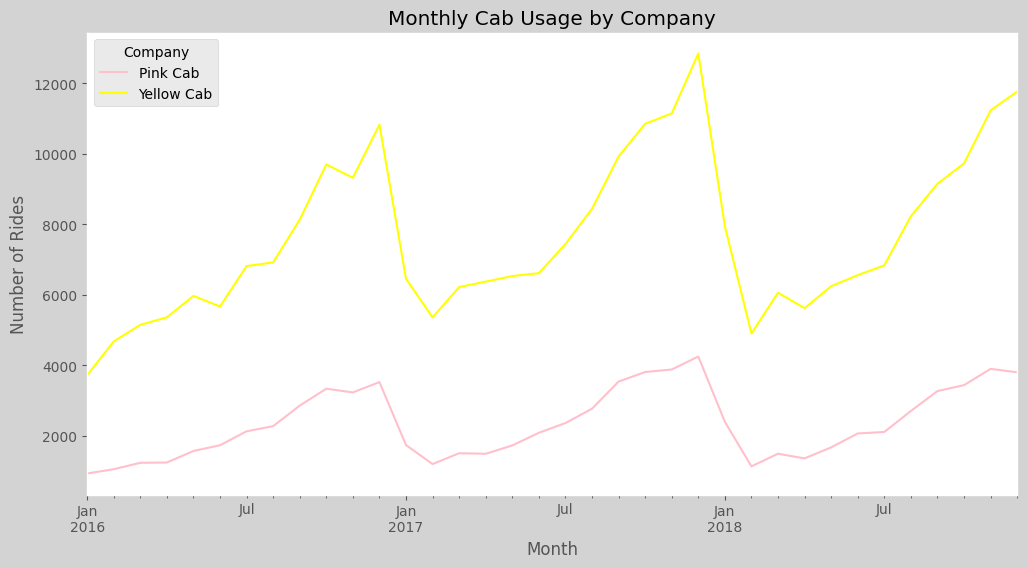

In [17]:
# Create a period column for Year-Month
final_merged_data['YearMonth'] = final_merged_data['Date of Travel'].dt.to_period('M')

# Group by Year-Month and Company, then count the number of rides
monthly_usage = final_merged_data.groupby(['YearMonth', 'Company']).size().unstack()

# Plot the data with custom colors
fig, ax = plt.subplots(figsize=(12, 6))

# Set background color
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('white')

# Plot the data with specified colors for the lines
monthly_usage.plot(kind='line', ax=ax, color={'Yellow Cab': 'yellow', 'Pink Cab': 'pink'})

# Set titles and labels
ax.set_title('Monthly Cab Usage by Company')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Rides')

# Display the plot
plt.show()


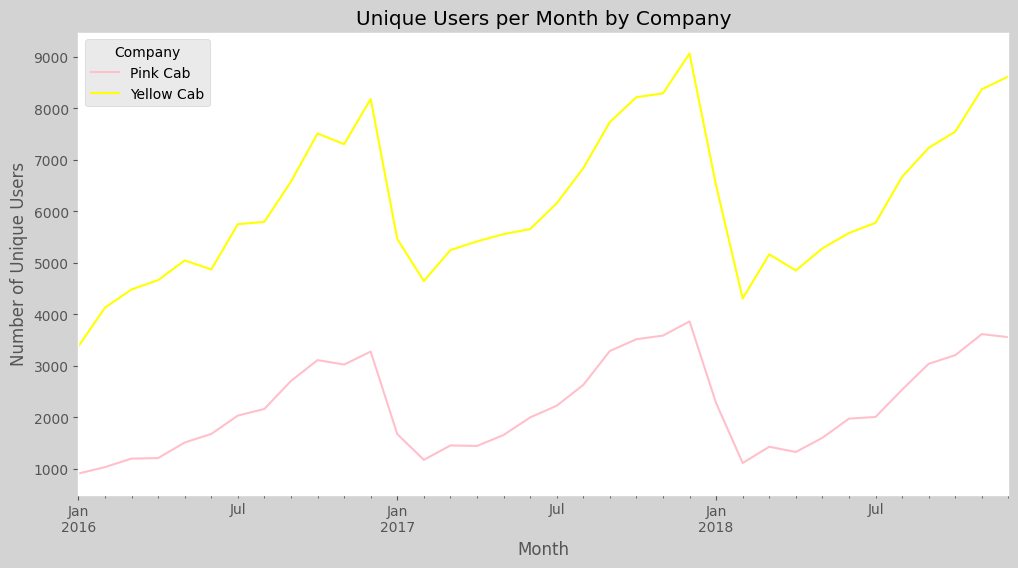

In [18]:
# Extract Year-Month from Date of Travel
final_merged_data['YearMonth'] = final_merged_data['Date of Travel'].dt.to_period('M')

# Calculate unique users per month for each company
unique_users_per_month = final_merged_data.groupby(['YearMonth', 'Company'])['Customer ID'].nunique().unstack()

# Plot unique users per month for each company
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('white')
unique_users_per_month.plot(kind='line', ax=ax, color={'Yellow Cab': 'yellow', 'Pink Cab': 'pink'})
ax.set_title('Unique Users per Month by Company')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Unique Users')
plt.show()


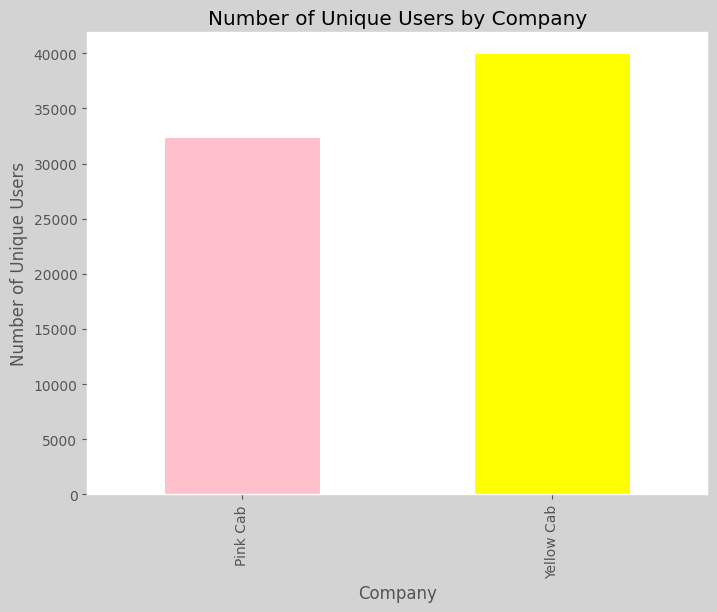

In [19]:
# Group by Company and count unique Customer IDs
user_counts = final_merged_data.groupby('Company')['Customer ID'].nunique()

# Create a bar plot with custom background colors
fig, ax = plt.subplots(figsize=(8, 6))

# Set background color
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('white')

# Plot the data with specified colors for the bars
user_counts.plot(kind='bar', ax=ax, color=['pink' if company == 'Pink Cab' else 'yellow' for company in user_counts.index])

# Set titles and labels
ax.set_title('Number of Unique Users by Company')
ax.set_xlabel('Company')
ax.set_ylabel('Number of Unique Users')

# Display the plot
plt.show()

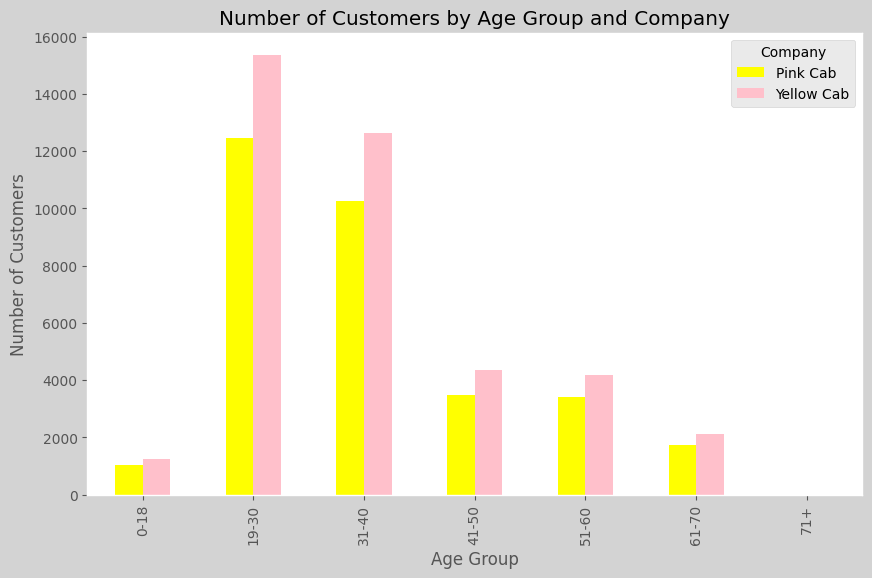

In [20]:
# Define age groups
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71+']
final_merged_data['Age Group'] = pd.cut(final_merged_data['Age'], bins, labels=labels)

# Calculate number of customers by age group and company
customers_by_age_group = final_merged_data.groupby(['Age Group', 'Company'])['Customer ID'].nunique().unstack().fillna(0)

# Plot number of customers by age group with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('white')

# Define custom colors for the bars
colors = ['yellow', 'pink']

customers_by_age_group.plot(kind='bar', ax=ax, color=colors)

# Set titles and labels
ax.set_title('Number of Customers by Age Group and Company')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Customers')

# Display the plot
plt.show()


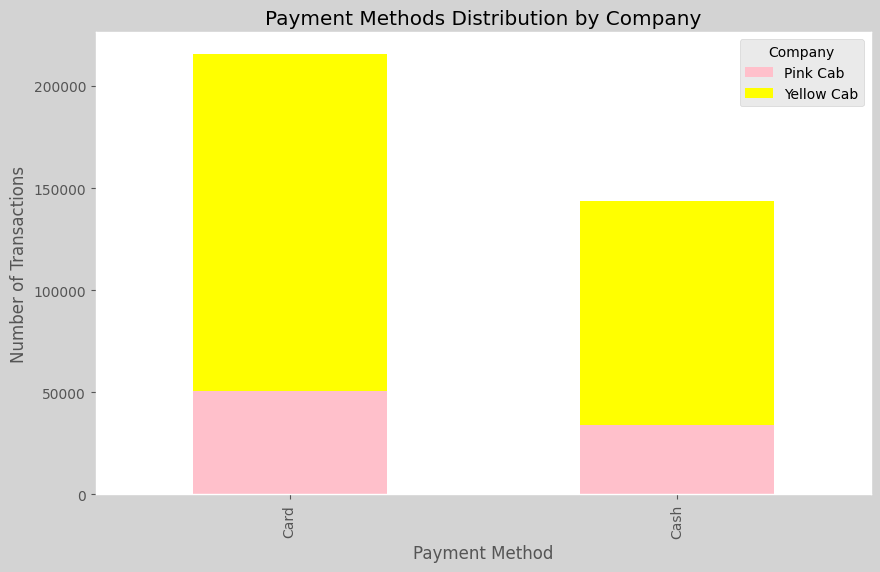

In [21]:
import matplotlib.pyplot as plt

# Calculate distribution of payment methods by company
payment_methods = final_merged_data.groupby(['Payment_Mode', 'Company']).size().unstack().fillna(0)

# Plot distribution of payment methods with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('white')

# Define custom colors for the bars
colors = ['pink', 'yellow']

payment_methods.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set titles and labels
ax.set_title('Payment Methods Distribution by Company')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Number of Transactions')

# Display the plot
plt.show()

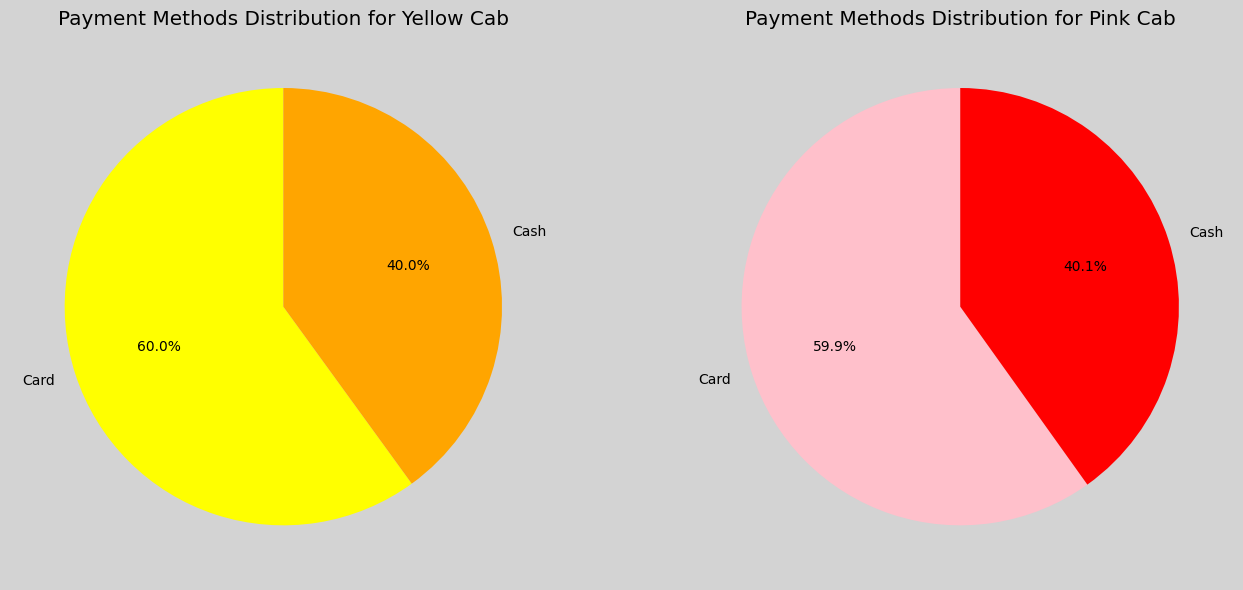

In [31]:
# Calculate distribution of payment methods by company
payment_methods = final_merged_data.groupby(['Payment_Mode', 'Company']).size().unstack().fillna(0)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('lightgrey')

# Plot for Yellow Cab
axes[0].pie(payment_methods['Yellow Cab'], labels=payment_methods.index, autopct='%1.1f%%', colors=['yellow', 'orange'], startangle=90)
axes[0].set_title('Payment Methods Distribution for Yellow Cab')
axes[0].set_facecolor('white')

# Plot for Pink Cab
axes[1].pie(payment_methods['Pink Cab'], labels=payment_methods.index, autopct='%1.1f%%', colors=['pink', 'red'], startangle=90)
axes[1].set_title('Payment Methods Distribution for Pink Cab')
axes[1].set_facecolor('white')

# Display the plots
plt.tight_layout()
plt.show()

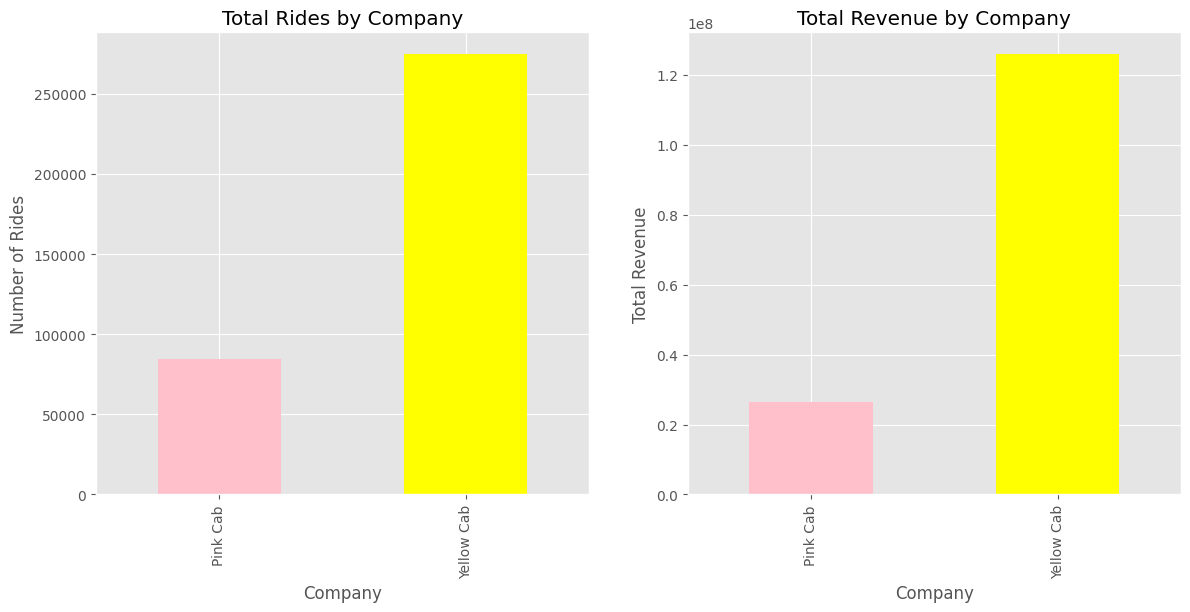

In [26]:
# Company Performance Comparison
# Grouping data for company performance comparison
company_rides = final_merged_data.groupby('Company')['Transaction ID'].count()
company_revenue = final_merged_data.groupby('Company')['Price Charged'].sum()

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting total rides by company with custom colors
company_rides.plot(kind='bar', ax=ax[0], title='Total Rides by Company', color=['pink', 'yellow'])
ax[0].set_ylabel('Number of Rides')

# Plotting total revenue by company with custom colors
company_revenue.plot(kind='bar', ax=ax[1], title='Total Revenue by Company', color=['pink', 'yellow'])
ax[1].set_ylabel('Total Revenue')

# Displaying the plots
plt.show()

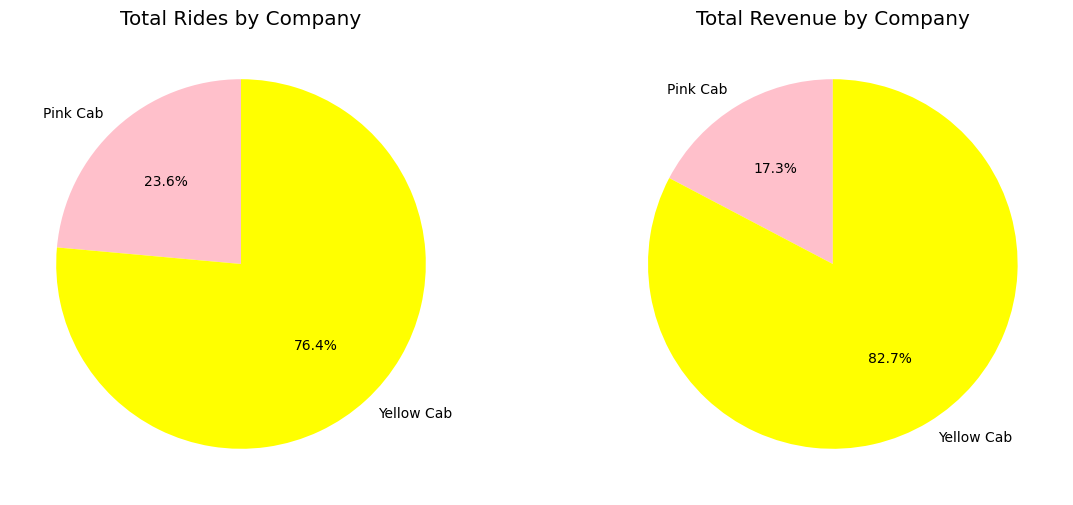

In [27]:
# Grouping data for company performance comparison
company_rides = final_merged_data.groupby('Company')['Transaction ID'].count()
company_revenue = final_merged_data.groupby('Company')['Price Charged'].sum()

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting total rides by company as pie chart with custom colors
ax[0].pie(company_rides, labels=company_rides.index, autopct='%1.1f%%', colors=['pink', 'yellow'], startangle=90)
ax[0].set_title('Total Rides by Company')

# Plotting total revenue by company as pie chart with custom colors
ax[1].pie(company_revenue, labels=company_revenue.index, autopct='%1.1f%%', colors=['pink', 'yellow'], startangle=90)
ax[1].set_title('Total Revenue by Company')

# Displaying the plots
plt.show()